<!-- Name-Raja Kumar
Assignment-Baseball Case Study
Batch-DS2312 -->

<!-- Problem Statement-
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Output: Number of predicted wins (W) -->

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')

In [34]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [35]:
data.shape

(30, 17)

There are 30 columns in this dataset which is less but we have to make the model out of this only

In [39]:
data['W'].value_counts()

W
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: count, dtype: int64

The unique values in each and every column

In [41]:
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [43]:
data['ER'].value_counts()

ER
601    1
653    1
655    1
659    1
597    1
553    1
749    1
698    1
638    1
577    1
557    1
700    1
682    1
546    1
532    1
478    1
664    1
677    1
630    1
572    1
680    1
694    1
604    1
646    1
652    1
609    1
746    1
643    1
584    1
799    1
Name: count, dtype: int64

In [45]:
data['RA'].value_counts()

RA
641    1
700    1
731    1
713    1
627    1
595    1
809    1
760    1
678    1
635    1
613    1
754    1
737    1
608    1
596    1
525    1
729    1
726    1
675    1
618    1
733    1
753    1
642    1
693    1
698    1
670    1
803    1
701    1
640    1
844    1
Name: count, dtype: int64

so in this column i think all the columns are of same use and we do not need to drop any of those here

In [46]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

zero null values in the data

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All the columns are either float or int64 none of them have a object datatype

<Axes: >

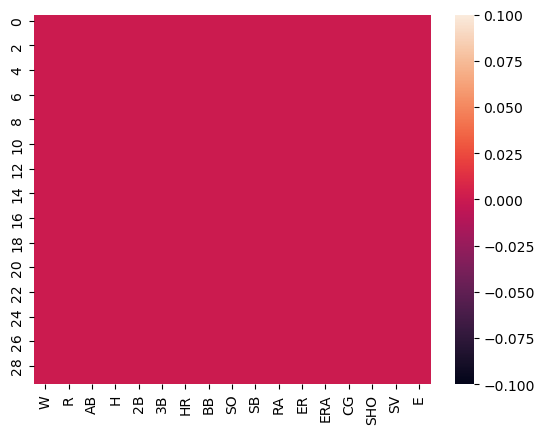

In [48]:
sns.heatmap(data.isna())

The heatmap also shows the data set has no nulls at all

Description of the dataset

In [49]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Most of the columns are looking like they have a normal distribution 
We will know the exact scenerio when we will visualize the data

univarate analysis

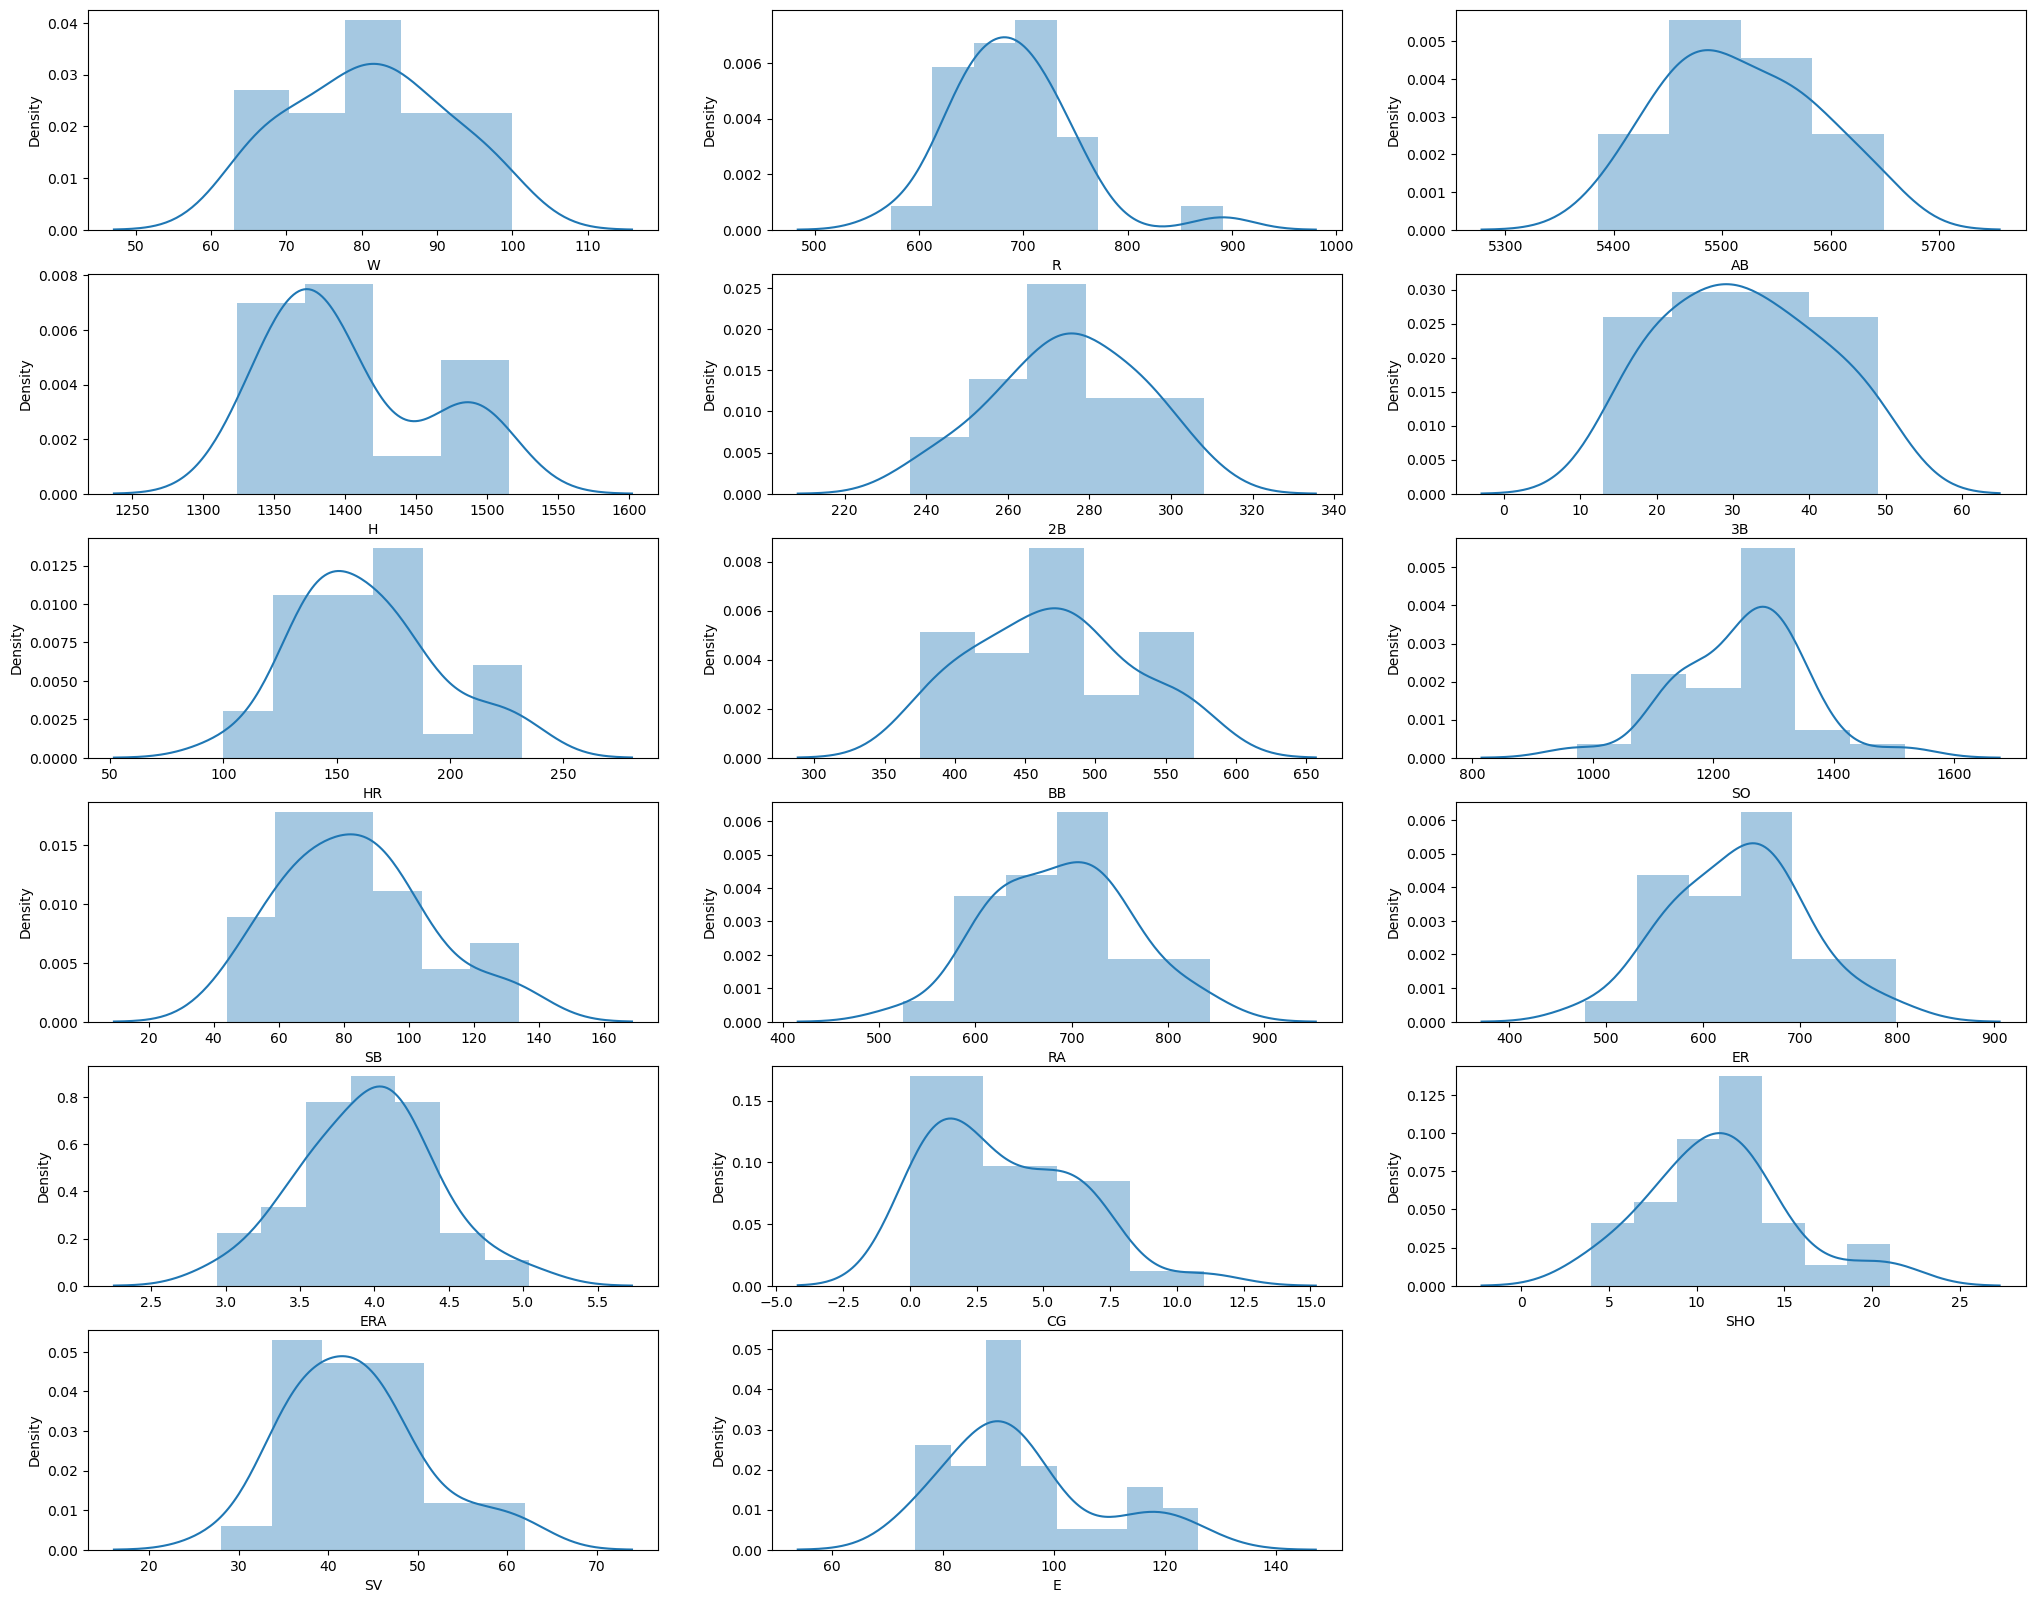

In [50]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.distplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

So all the data looks like normal distribution
Let us see the box to visualize which column has outliers

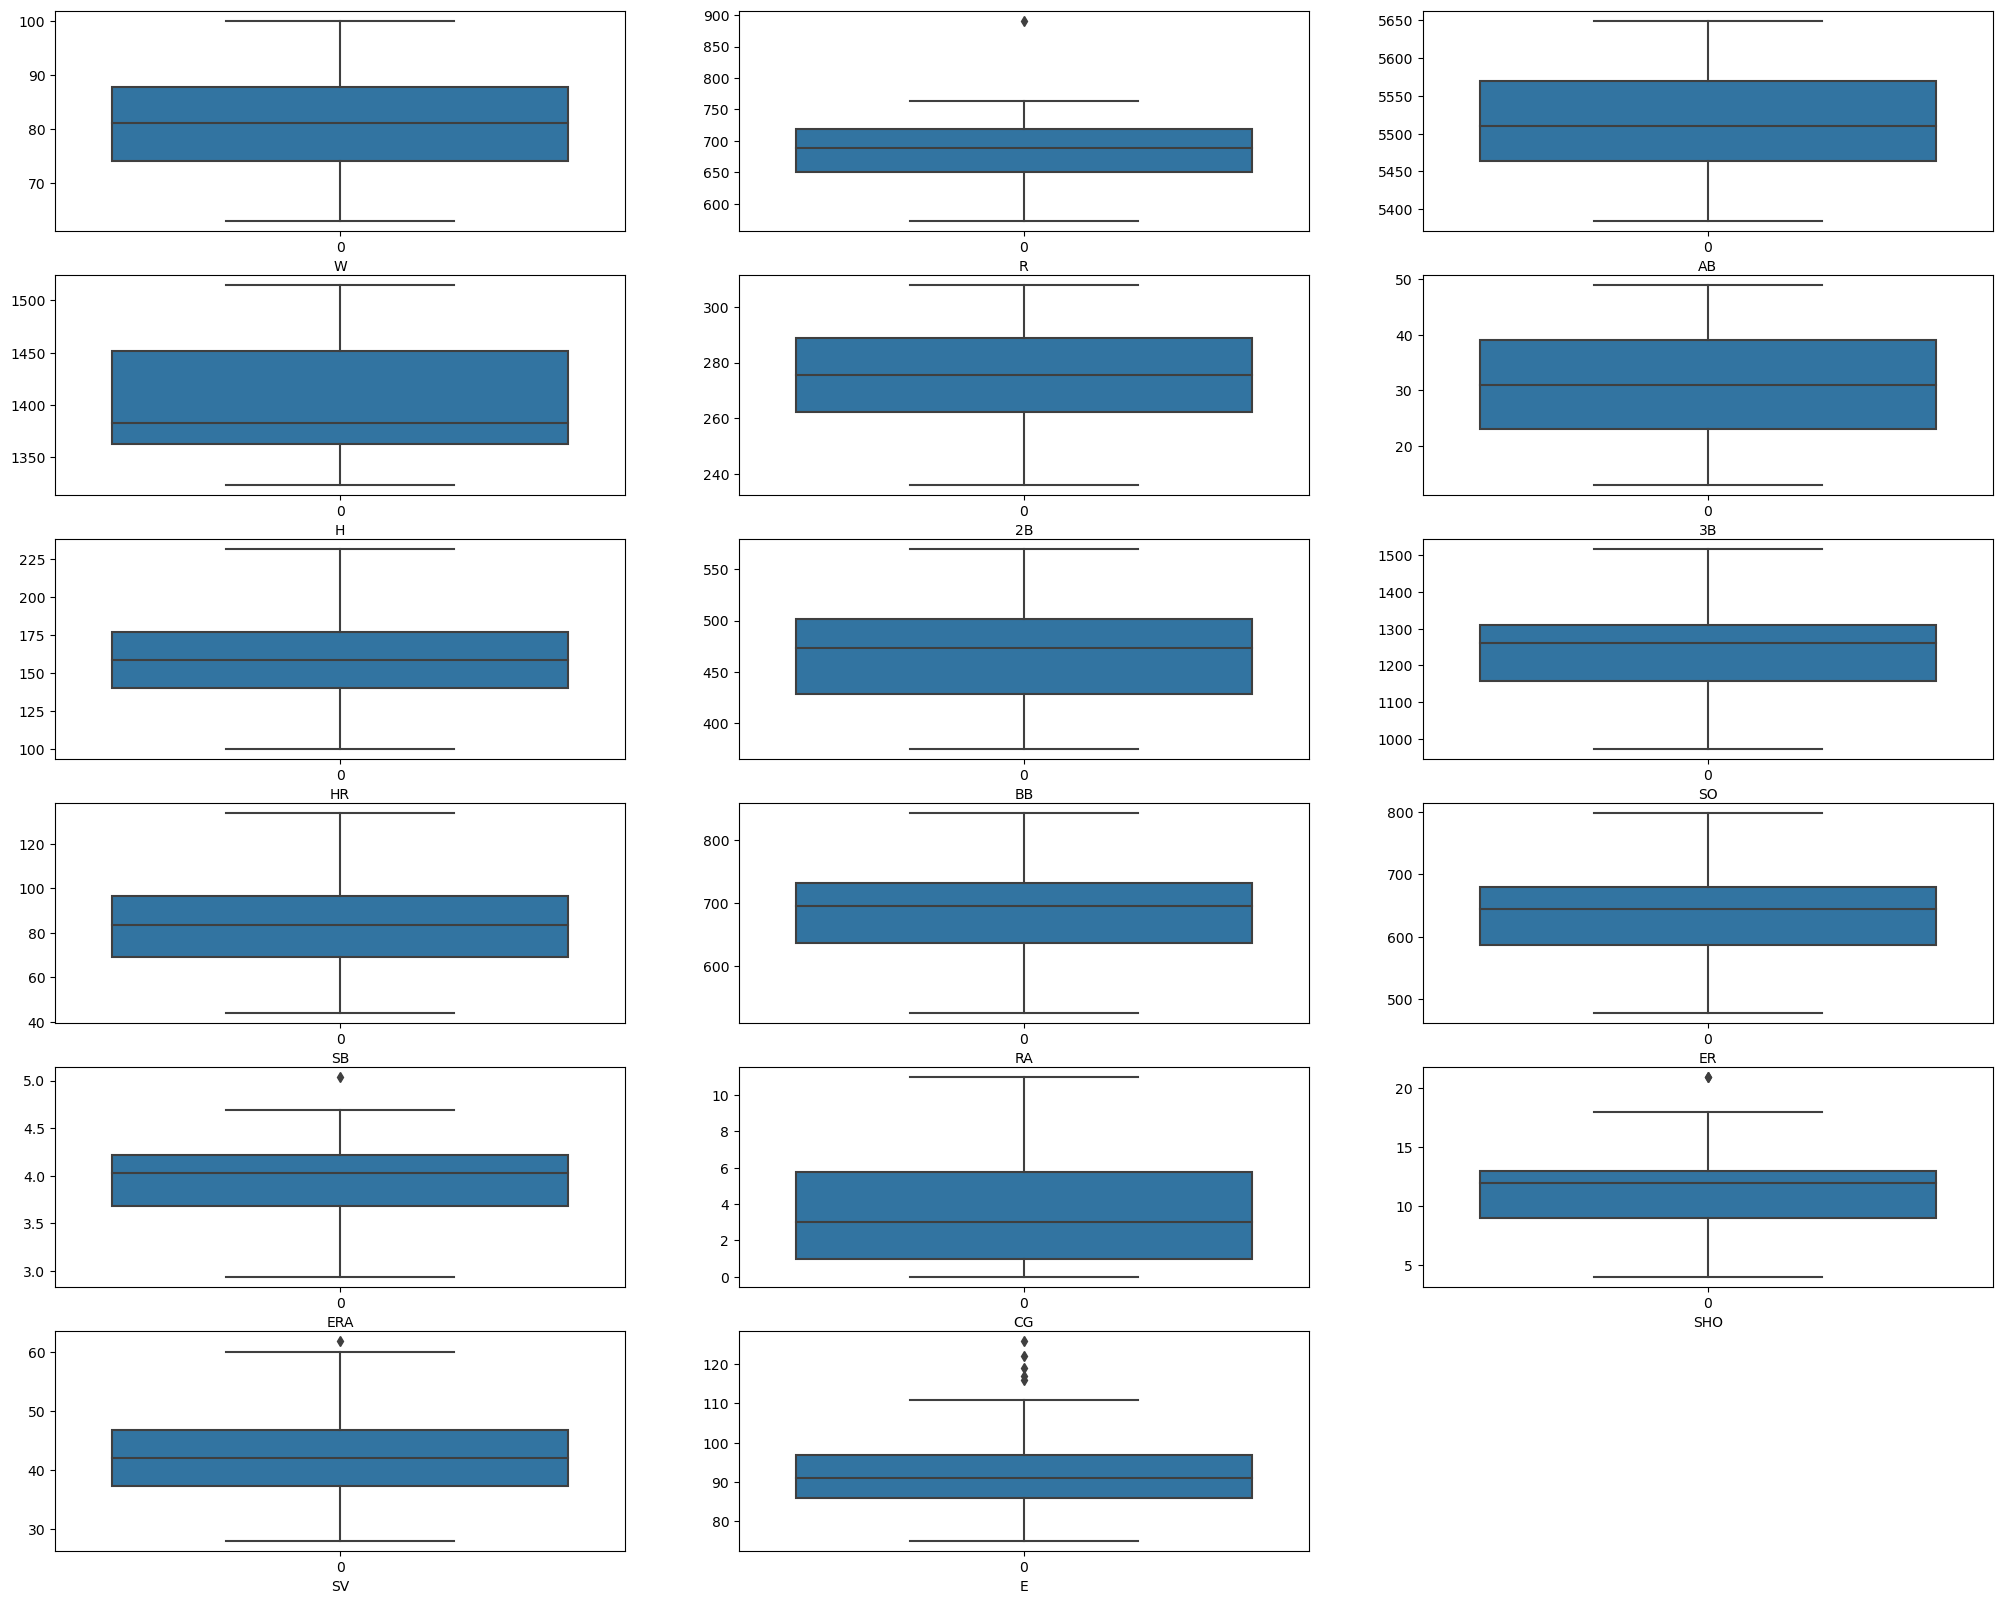

In [51]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

Let us first do the analysis part we will remove the outliers after this

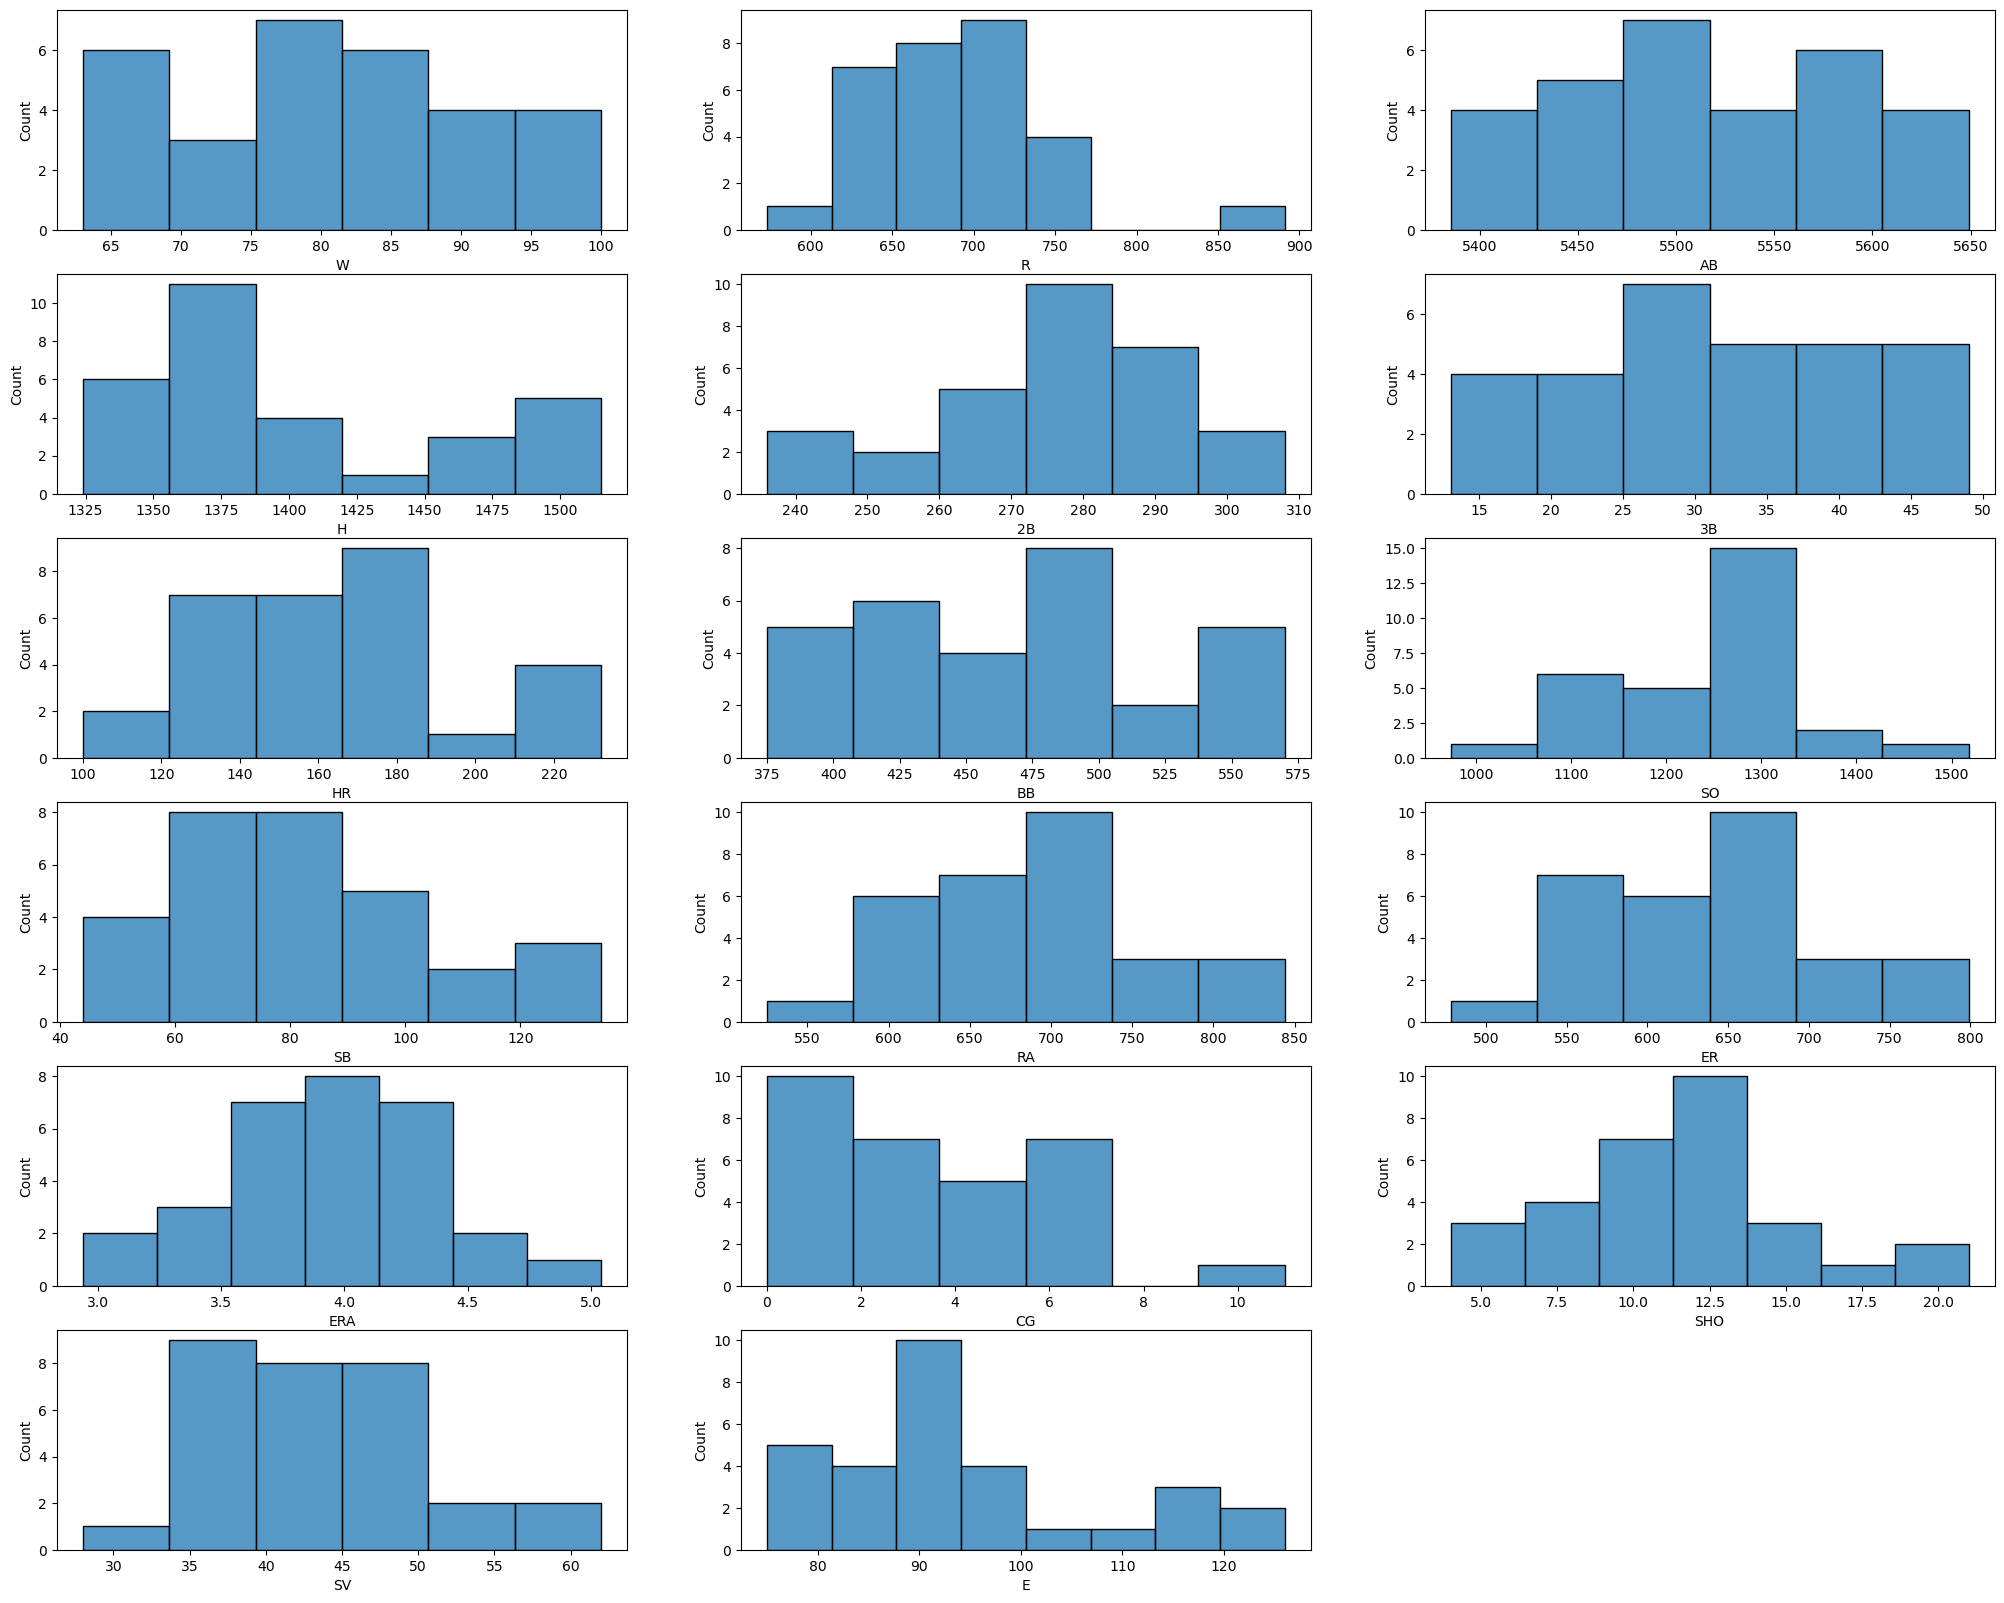

In [52]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.histplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

Let us now visualize the relation of different columns with the label
Bivarate analysis

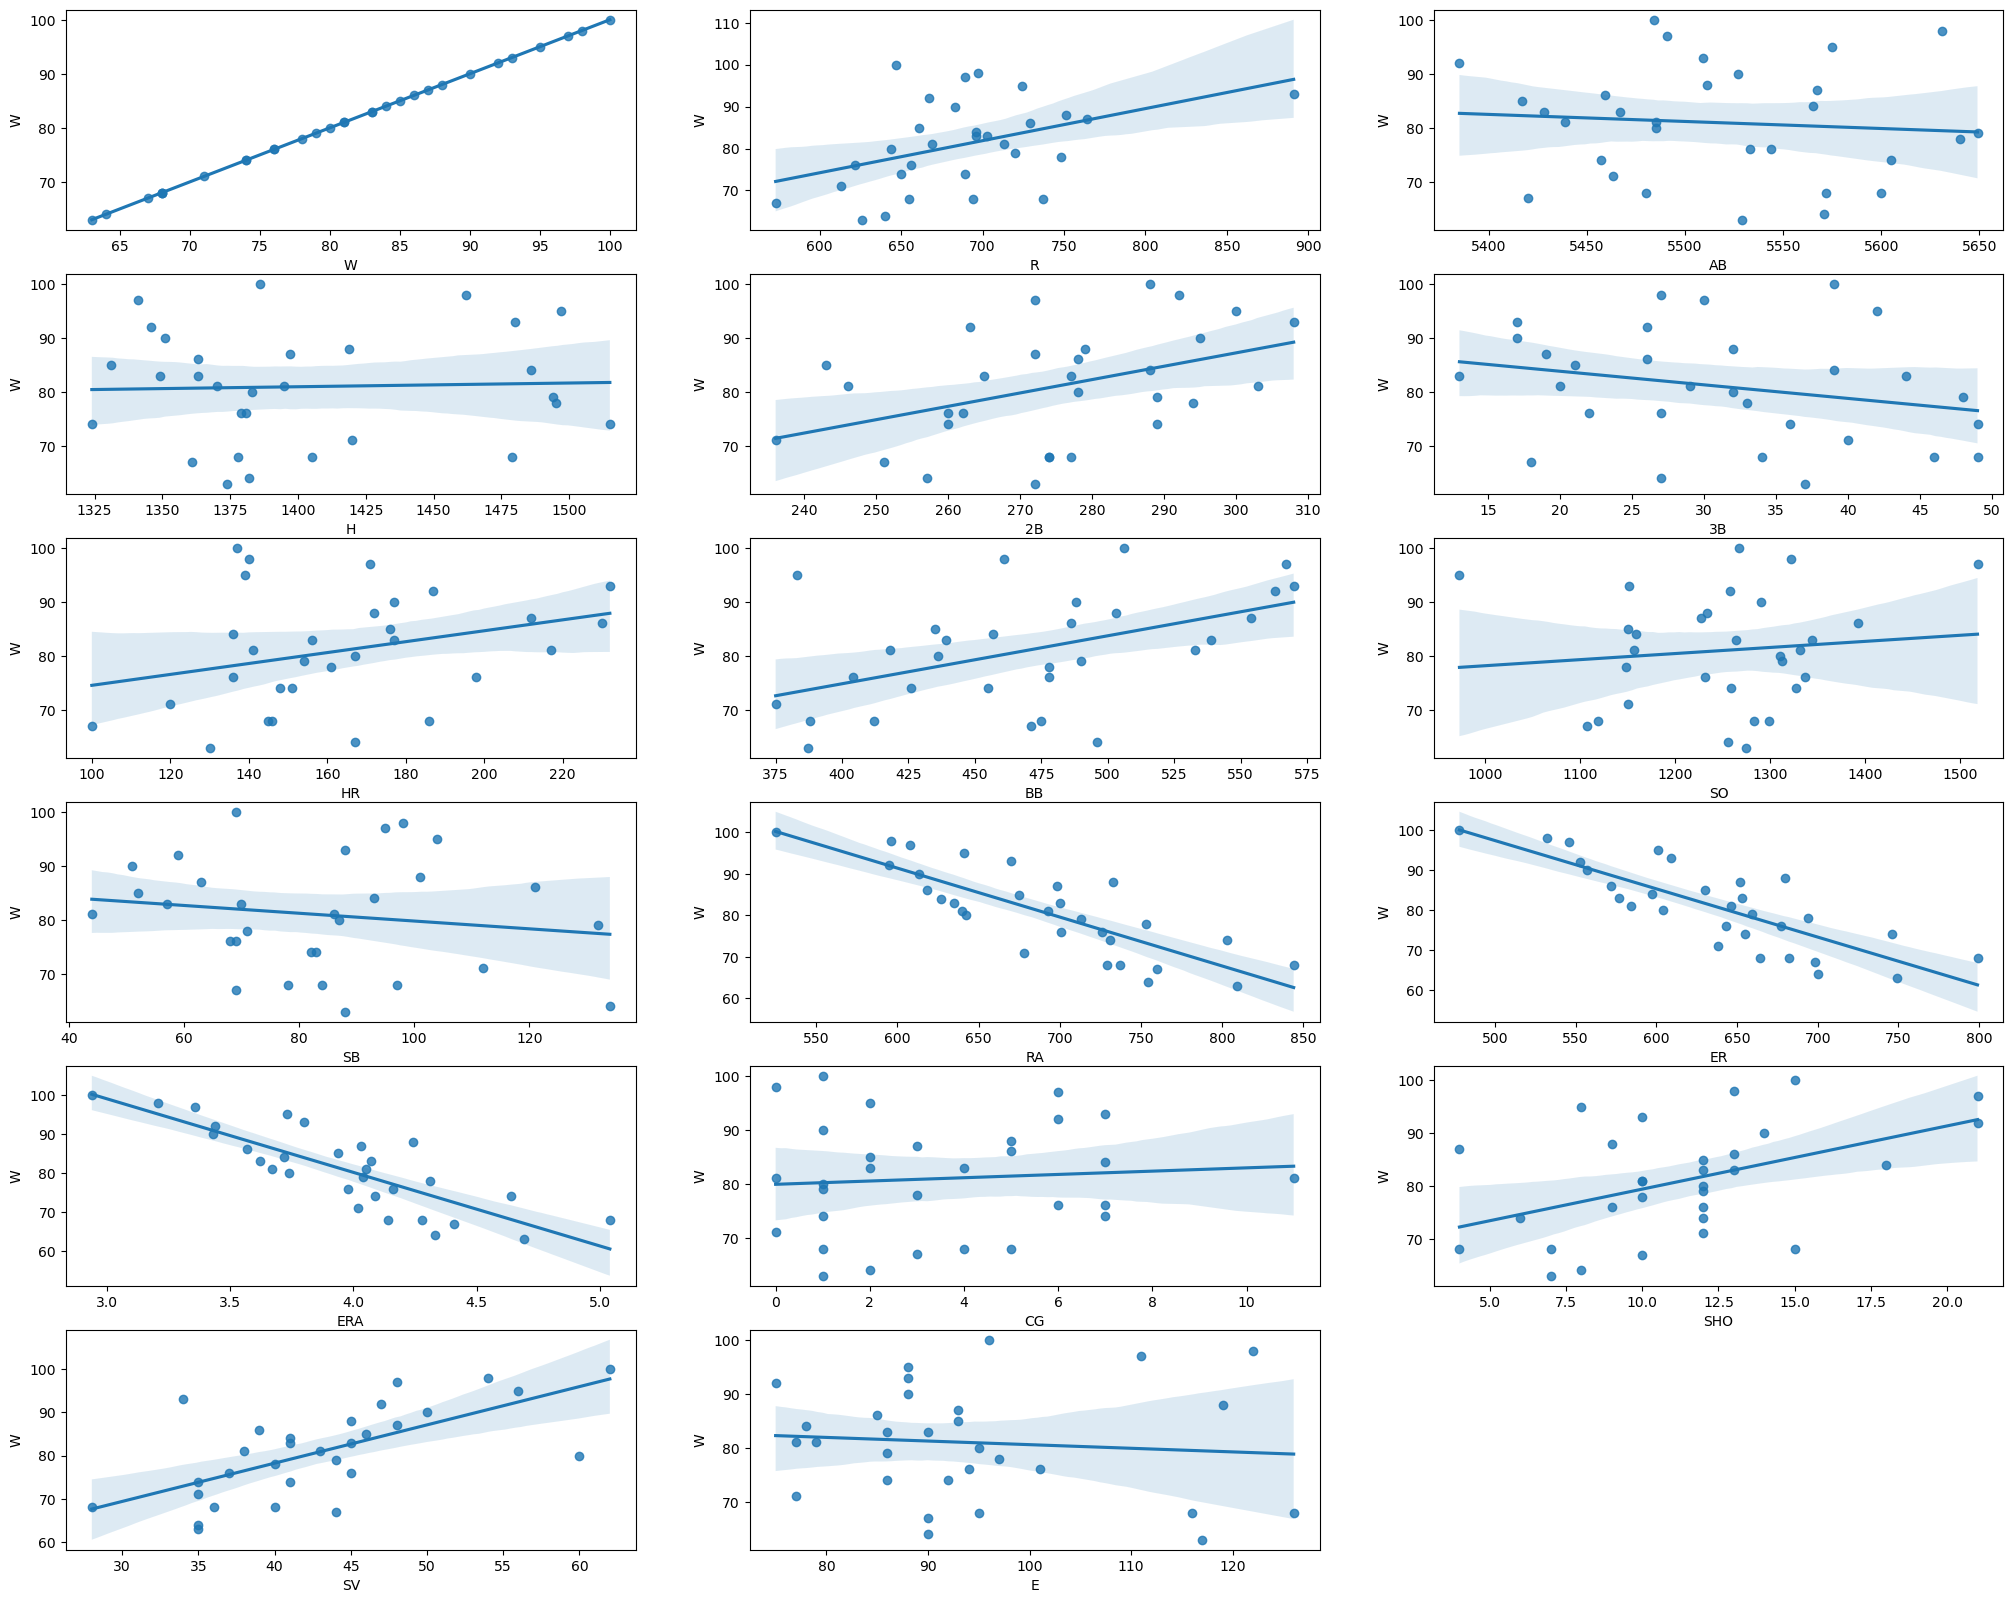

In [54]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.regplot(x=data[i],y=data['W'])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

We have used the regplot as it shows the direction along witht the scatter plot

One thing we can clearly see here is that some columns have negative and some have positive relation with the label

Let us see the heatmap to see which column has what kind of relation with the label

In [55]:
corr=data.corr()

<Axes: >

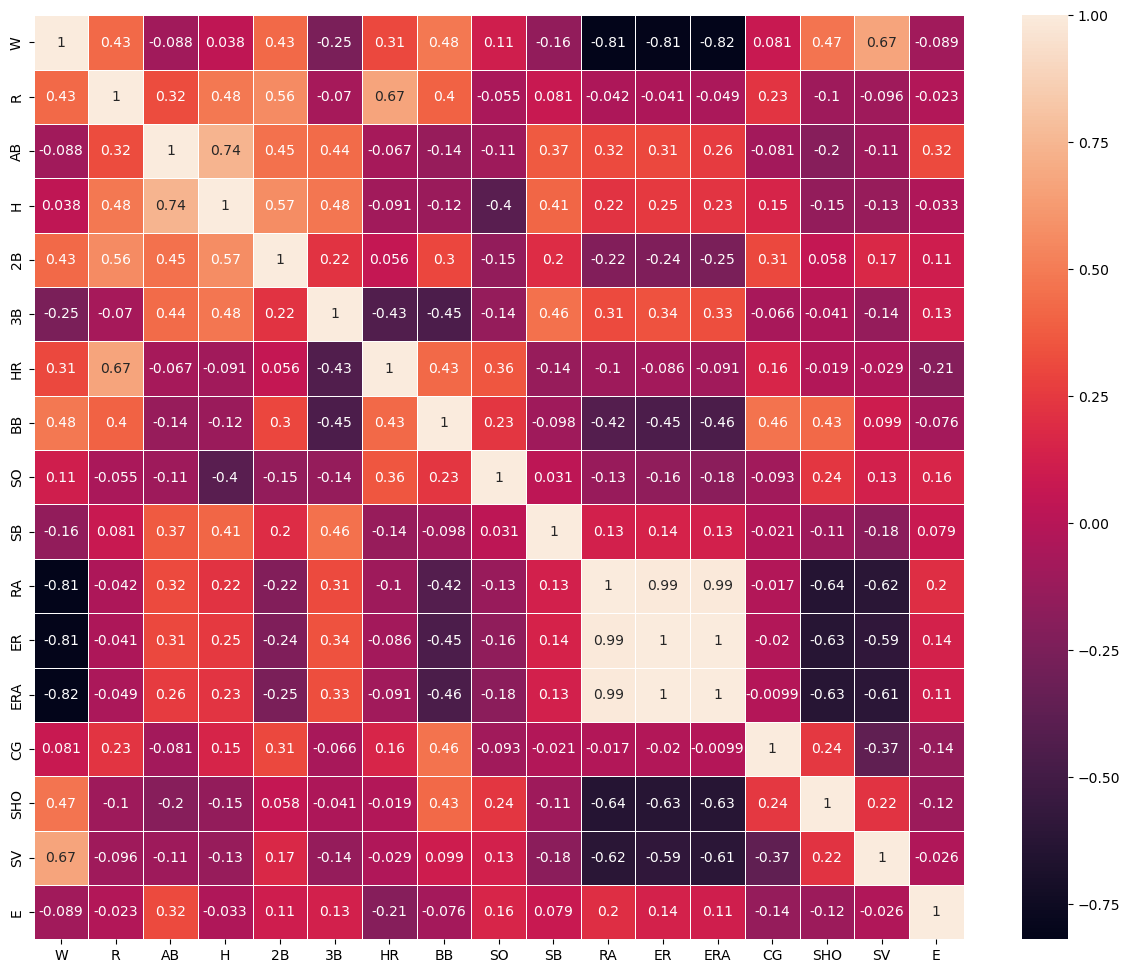

In [56]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,linewidths=0.4)

Here 3 columns are having very high relation let us visualize them after that we can delete some of them for a better model

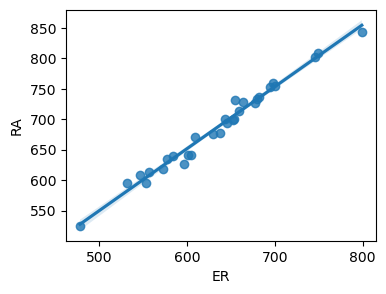

In [61]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ER'],y=data['RA'])
plt.show()

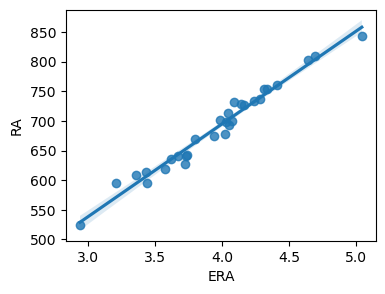

In [62]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ERA'],y=data['RA'])
plt.show()

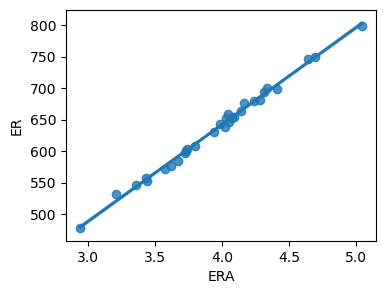

In [63]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ERA'],y=data['ER'])
plt.show()

<!-- It seems to be a very high relation between them 
We will have to drop 2 of them any how
We will see which has more relation with the label afterthat we will drop  -->

In [65]:
data[['ER','RA','ERA','W']].corr()

,ER,RA,ERA,W
ER,1.000000,0.991018,0.997248,-0.809435
RA,0.991018,1.000000,0.986674,-0.812952
ERA,0.997248,0.986674,1.000000,-0.819600
W,-0.809435,-0.812952,-0.819600,1.000000


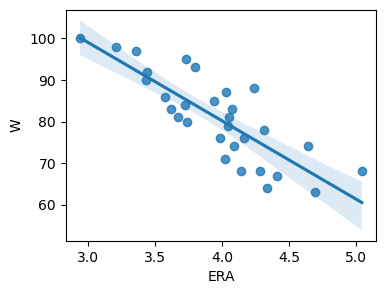

In [66]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ERA'],y=data['W'])
plt.show()

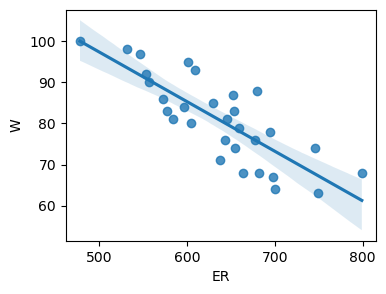

In [67]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ER'],y=data['W'])
plt.show()

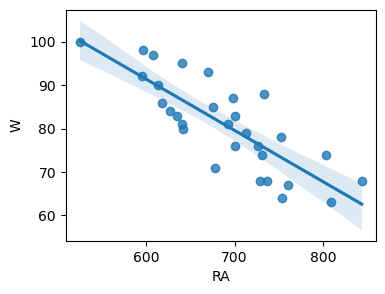

In [68]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['RA'],y=data['W'])
plt.show()

`More or less they have the same relation with the label also
The era had a little bit higher relation than remaining other so we will keep it and drop other

In [69]:
data=data.drop(columns=['ER','RA'])

In [70]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [71]:
corr=data.corr()

<Axes: >

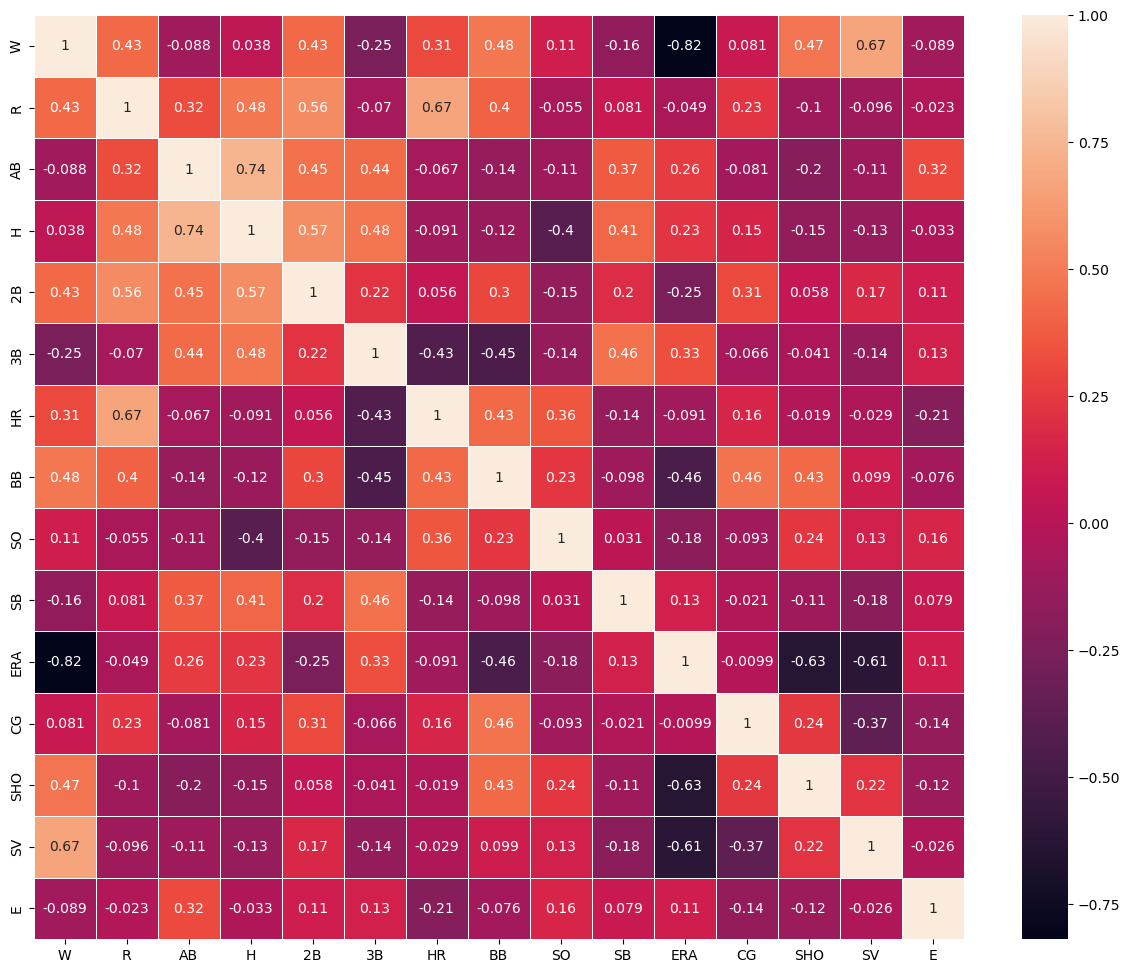

In [72]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,linewidths=0.4)

<!-- There is a relation between ab and h also 
Let us visualize this also -->

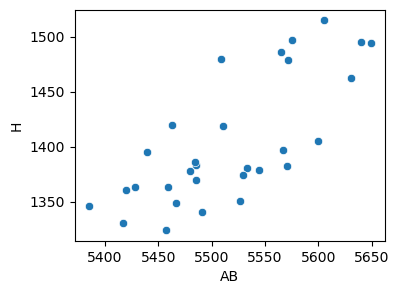

In [74]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=data['AB'],y=data['H'])
plt.show()

<!-- The relation is there but not that much big 
So we will keep these two both instead of deleting -->

In [75]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [82]:
corr['W'].sort_values()

ERA   -0.819600
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

<!-- We can see all the features are related to the label in a positive or in a negative way also -->

Let us now treat the outiers 

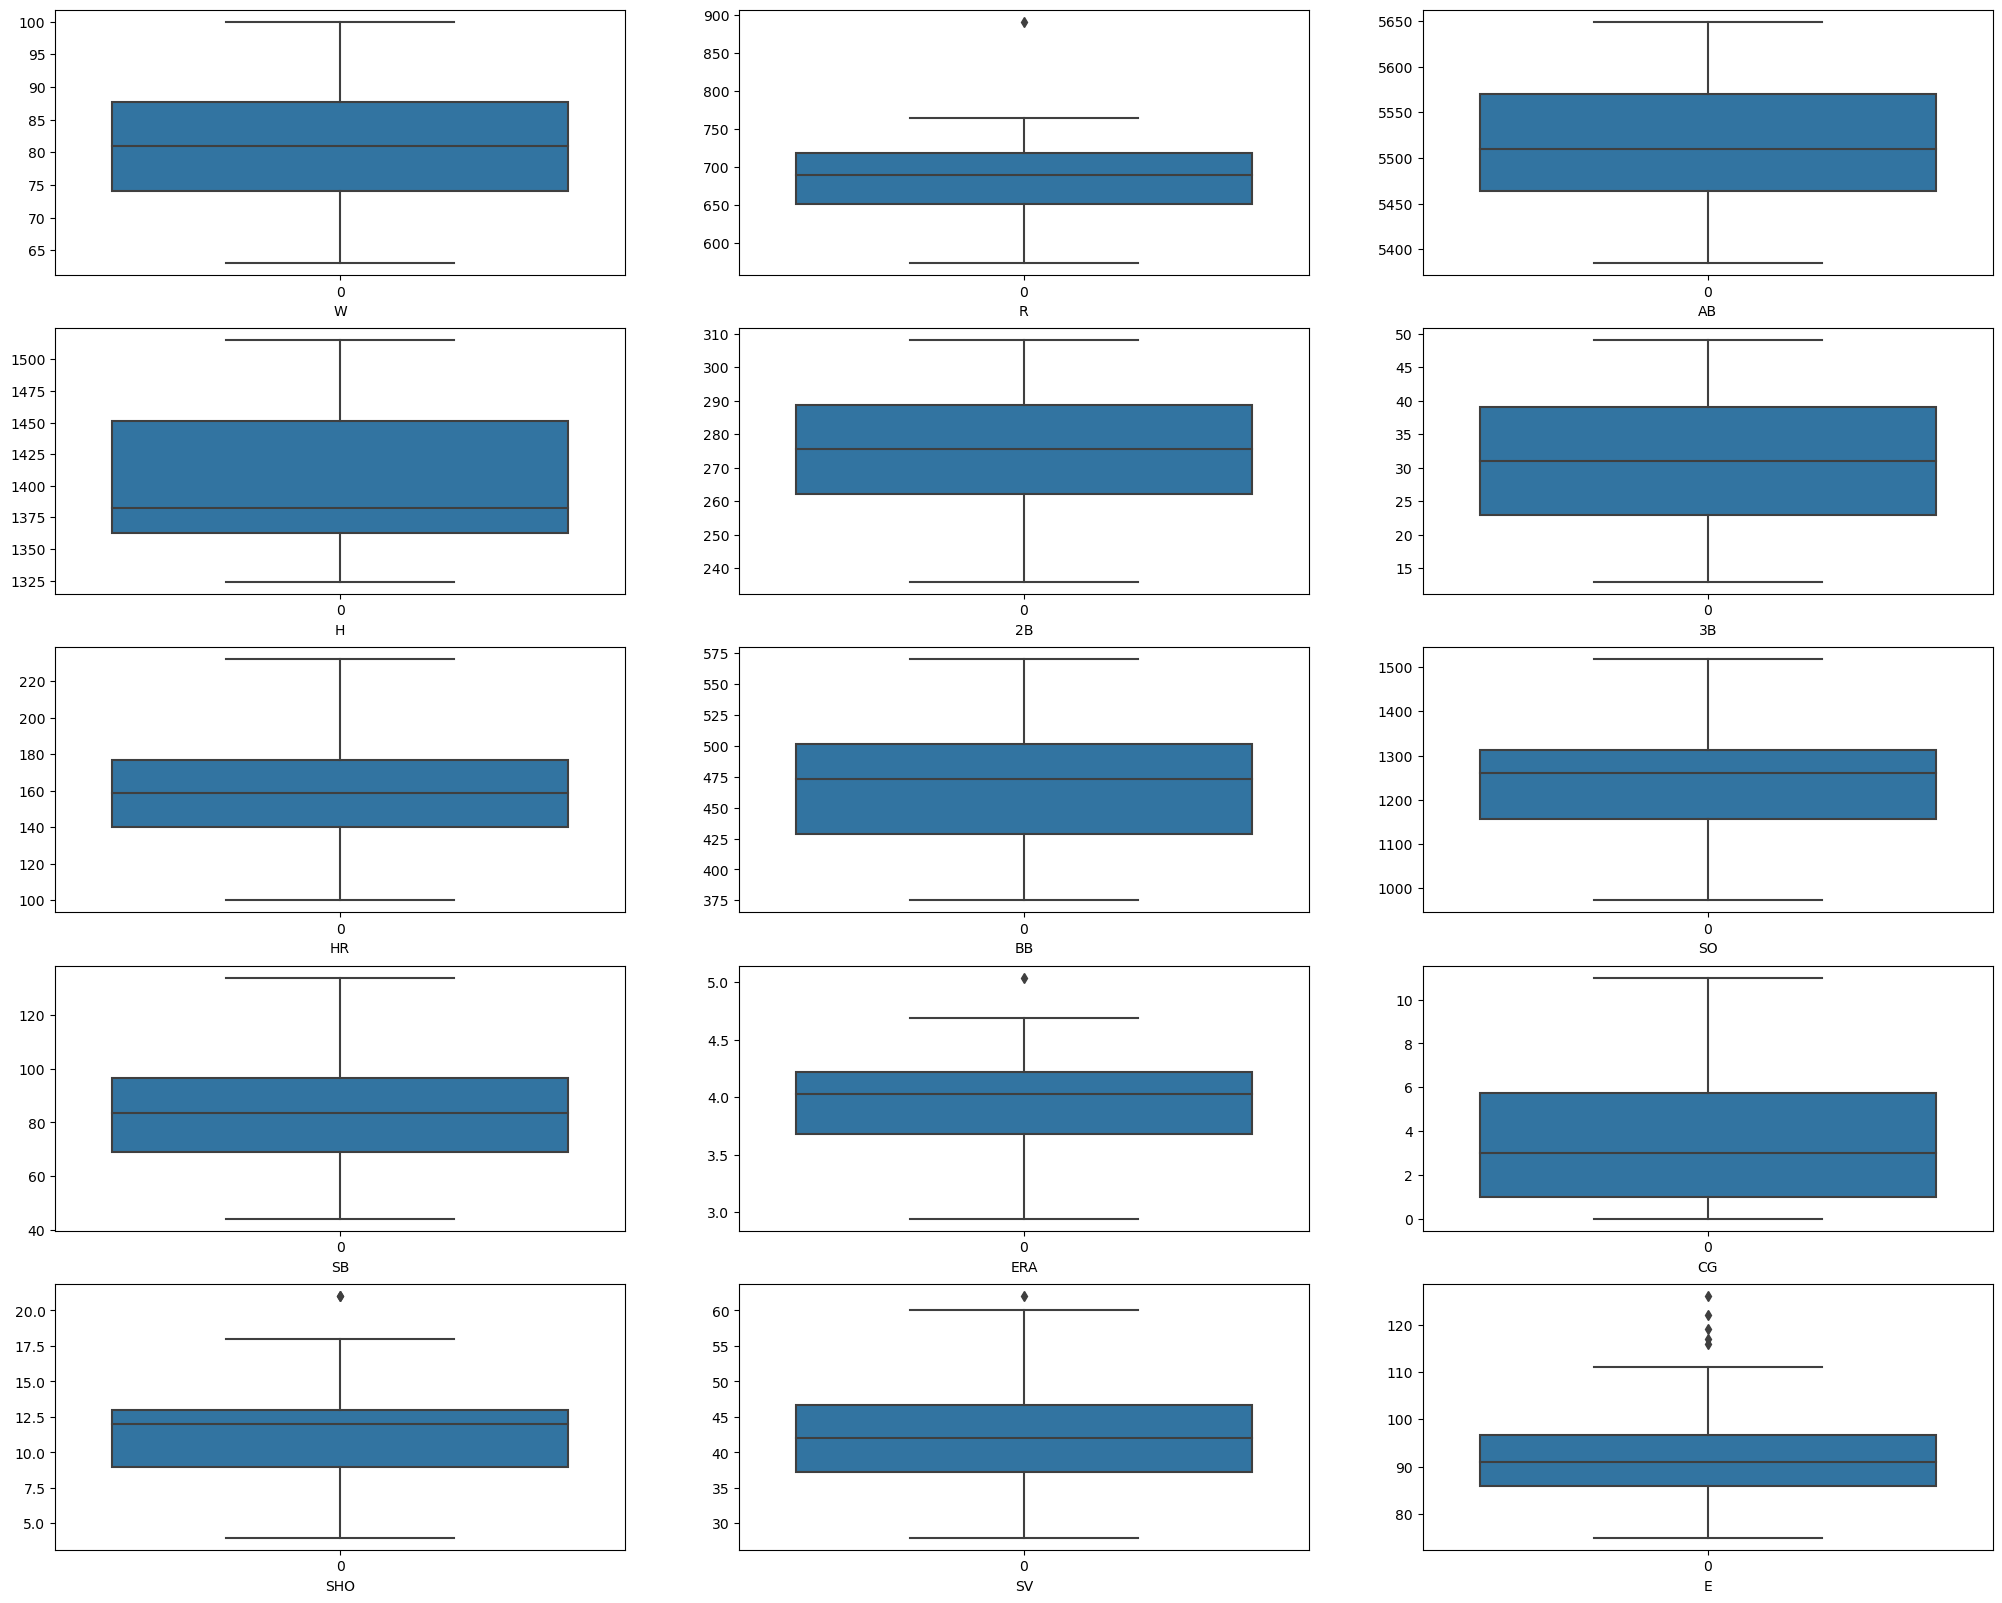

In [84]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(5,3,plotnumber)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

<!-- let us remove the outliers using z score -->

In [86]:
shape=data.shape

In [87]:
from scipy.stats import zscore

In [89]:
Zscore=np.abs(zscore(data))

In [95]:
index=np.where(Zscore>3) #The data points outside the z score value of 3 is considered to be autlier

In [96]:
index=index[0]

In [98]:
data=data.drop(index=index)

In [99]:
data.shape

(29, 15)

<!-- We only lost 1 data points and cleaned our data also -->

In [100]:
data.reset_index(drop=True)
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,4.24,5,9,45,119


<!-- All the preprocessing parts are over now let us make the model -->

In [101]:
from sklearn.preprocessing import StandardScaler

In [103]:
x=data.drop(columns='W')
y=data['W'] #Dividing the dataset into features and label

In [104]:
x_scaled=StandardScaler().fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.614123,0.617213,-0.570122,0.211006,1.757915


Let us see the variance inflation factor

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
for i in range(14):
    print(x.columns[i])
    print(variance_inflation_factor(x_scaled,i))
    print('       ')

R
6.787762402286184
       
AB
4.98174310026316
       
H
8.569580757190774
       
2B
3.4161160535285524
       
3B
3.2395646472803783
       
HR
6.590924622596858
       
BB
3.0815597521994462
       
SO
2.106522473924663
       
SB
1.842527529511916
       
ERA
4.931065854446874
       
CG
2.649063414598936
       
SHO
3.2310294873277874
       
SV
3.0758654098861187
       
E
2.0396414588246703
       


The r and h having high vif scores 
Let us drop H and see the scores now

In [107]:
x_scaled=x_scaled.drop(columns='H')

In [108]:
for i in range(13):
    print(x.columns[i])
    print(variance_inflation_factor(x_scaled,i))
    print('       ')

R
4.4281637493914605
       
AB
2.350073381486256
       
H
3.4110448497361117
       
2B
3.1917256444310347
       
3B
4.801655003830617
       
HR
2.635823417195252
       
BB
2.087109105407122
       
SO
1.6001462024521593
       
SB
4.311502739792131
       
ERA
2.267940654543183
       
CG
2.928226619702487
       
SHO
2.5885815516158357
       
SV
1.4017153791628423
       


All the columns have low vif scores 
Now let us make the model

In [114]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor

In [111]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9187346548454276 15


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=maxrs) #We used the best random state

In [115]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
knn=KNeighborsRegressor()

In [117]:
models=[rr,er,lr,gb,ad,bg,ri,ls,knn]

In [118]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
print(accuracy)

{RandomForestRegressor(): 0.6373946680080482, ExtraTreesRegressor(): 0.7041937625754527, LinearRegression(): 0.9239044045638883, GradientBoostingRegressor(): 0.5146529032360851, AdaBoostRegressor(): 0.6944097920858485, BaggingRegressor(): 0.4445674044265595, Ridge(): 0.8856353533797431, LassoCV(): 0.8730590566725874, KNeighborsRegressor(): 0.5228169014084512}


In [134]:
accuracy

{RandomForestRegressor(): 0.6373946680080482,
 ExtraTreesRegressor(): 0.7041937625754527,
 LinearRegression(): 0.9239044045638883,
 GradientBoostingRegressor(): 0.5146529032360851,
 AdaBoostRegressor(): 0.6944097920858485,
 BaggingRegressor(): 0.4445674044265595,
 Ridge(): 0.8856353533797431,
 LassoCV(): 0.8730590566725874,
 KNeighborsRegressor(): 0.5228169014084512}

In [135]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=5).mean())

RandomForestRegressor() , -0.6773336045181655
ExtraTreesRegressor() , -0.29502554469262765
LinearRegression() , 0.3406160370500349
GradientBoostingRegressor() , -1.287134137826386
AdaBoostRegressor() , -0.9346013715853948
BaggingRegressor() , -0.7814208764891444
Ridge() , 0.37119866142726665
LassoCV() , 0.45278264900264
KNeighborsRegressor() , -0.11198316239216695


In [136]:
param_grid = {
    'alphas': [[0.1, 0.5, 1.0, 2.0, 5.0]]  # List of alpha values to try
}

In [137]:
lasso_cv = LassoCV(cv=5)

In [141]:
grid_search = GridSearchCV(lasso_cv, param_grid, cv=5)
grid_search.fit(x_scaled, y)

GridSearchCV(cv=5, estimator=LassoCV(cv=5),
             param_grid={'alphas': [[0.1, 0.5, 1.0, 2.0, 5.0]]})

In [142]:
grid_search.best_score_

0.4441997063175613

In [143]:
grid_search.best_params_

{'alphas': [0.1, 0.5, 1.0, 2.0, 5.0]}

In [145]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.26],
    'fit_intercept': [True, False],  # Corrected: Specify boolean values directly
    'max_iter': [2, 4, 6, 8, 10],
    'selection': ['cyclic', 'random'],
    'tol': [100, 1000]
}

# Create a Lasso model
lasso = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')


In [146]:
grid_search.fit(x_scaled,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': [True, False],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]},
             scoring='neg_mean_squared_error')

In [147]:
grid_search.best_estimator_

Lasso(alpha=0.1, max_iter=6, selection='random', tol=100)

In [ ]:
model=lasso()

In [148]:
from sklearn.linear_model import Lasso

# Create a Lasso model with specified hyperparameters
lasso_model = Lasso(alpha=0.1, max_iter=6, selection='random', tol=100)

# Fit the model to your data
lasso_model.fit(x_train, y_train)  # Assuming X_train and y_train are your training data

# Once the model is fitted, you can use it to make predictions
predictions = lasso_model.predict(x_test)  # Assuming X_test is your test data


In [149]:
r2_score(y_test,predictions)

0.4153146299352718

In [151]:
X = data[['R','2B','SB','ERA','E']]
y = data['W']

In [152]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    #sc_y = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    #y_train = sc_y.fit_transform(y_train)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    b_score=lr.score(sc_X.transform(X_test),y_test)
    if b_score>best_score:
        best_score=b_score
        randomState=i

In [153]:
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 95.85074335877049 For Random state = 143


In [156]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 167)

In [157]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
print(accuracy)

{RandomForestRegressor(): 0.3339683391003463, ExtraTreesRegressor(): 0.34363685121107235, LinearRegression(): 0.44111336013412195, GradientBoostingRegressor(): 0.23021992454208573, AdaBoostRegressor(): 0.1705882352941176, BaggingRegressor(): 0.14396193771626264, Ridge(): 0.44456253403652735, LassoCV(): 0.4493121888382585, KNeighborsRegressor(): -0.33169550173010376}


In [158]:
accuracy

{RandomForestRegressor(): 0.3339683391003463,
 ExtraTreesRegressor(): 0.34363685121107235,
 LinearRegression(): 0.44111336013412195,
 GradientBoostingRegressor(): 0.23021992454208573,
 AdaBoostRegressor(): 0.1705882352941176,
 BaggingRegressor(): 0.14396193771626264,
 Ridge(): 0.44456253403652735,
 LassoCV(): 0.4493121888382585,
 KNeighborsRegressor(): -0.33169550173010376}

In [159]:
lr.score(x_test,y_test)

-85068.04995792026